# **Libraries**

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

First, we should call data ets from splitting section.

In [1]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

In the next sections, based on each model, we define specific pipeline and build and train model.

In [4]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R\u00b2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R\u00b2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R\u00b2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

# **Model Training**

## **Linear Regression**

In [ ]:
model = Pipeline([
    ("scaler", StandardScaler()),  # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9991, Training CV RMSE: 95.2011
Training R²: 0.9991, Training RMSE: 95.8568
Validation R²: 0.9996, Validation RMSE: 63.3000


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

## **Decision Tree**

In [ ]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8920, Training CV RMSE: 1030.2265
Training R²: 1.0000, Training RMSE: 0.0000
Validation R²: 0.8985, Validation RMSE: 990.0704


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

## **Random Forest Regressor**

In [ ]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9595, Training CV RMSE: 625.5095
Training R²: 0.9949, Training RMSE: 224.1702
Validation R²: 0.9625, Validation RMSE: 602.0794


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

## **Support Vector Regression**

In [ ]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("svr", SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.0685, Training CV RMSE: 3027.3353
Training R²: 0.0862, Training RMSE: 2999.4412
Validation R²: 0.0855, Validation RMSE: 2971.9019


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

## **XGBoost Regressor**

In [ ]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9920, Training CV RMSE: 280.2197
Training R²: 0.9986, Training RMSE: 116.9903
Validation R²: 0.9928, Validation RMSE: 264.4133


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

## **CatBoost Regression**

In [ ]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 162ms	remaining: 2m 41s
1:	learn: 2890.4135878	total: 165ms	remaining: 1m 22s
2:	learn: 2774.6653173	total: 169ms	remaining: 56.1s
3:	learn: 2665.5842386	total: 172ms	remaining: 42.7s
4:	learn: 2567.5958915	total: 174ms	remaining: 34.7s
5:	learn: 2469.5098712	total: 177ms	remaining: 29.3s
6:	learn: 2376.9738903	total: 179ms	remaining: 25.4s
7:	learn: 2297.0043203	total: 182ms	remaining: 22.6s
8:	learn: 2215.1927629	total: 185ms	remaining: 20.4s
9:	learn: 2139.8163751	total: 189ms	remaining: 18.7s
10:	learn: 2063.5877621	total: 192ms	remaining: 17.2s
11:	learn: 1992.1604502	total: 194ms	remaining: 16s
12:	learn: 1923.5305228	total: 198ms	remaining: 15.1s
13:	learn: 1858.1751387	total: 204ms	remaining: 14.4s
14:	learn: 1799.7401392	total: 208ms	remaining: 13.7s
15:	learn: 1743.3864607	total: 212ms	remaining: 13s
16:	learn: 1686.5267358	total: 218ms	remaining: 12.6s
17:	learn: 1628.8700788	total: 223ms	remaining: 12.2s
18:	learn:

This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

## **AdaBoost Regression**

In [ ]:
model = Pipeline([
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8850, Training CV RMSE: 1053.9252
Training R²: 0.8893, Training RMSE: 1043.8523
Validation R²: 0.8833, Validation RMSE: 1061.5074


This model is overfit (CV train and train have gap). But, since the gap between CV train and validation is small, that overfitting is not severe.

# **Model Selection**

Based on the result of default model is **CatBoost** with R2 0.9997 and RMSE $50

In [ ]:

best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R\u00b2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R\u00b2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R\u00b2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 4.44ms	remaining: 4.43s
1:	learn: 2890.4135878	total: 8.96ms	remaining: 4.47s
2:	learn: 2774.6653173	total: 12.1ms	remaining: 4.03s
3:	learn: 2665.5842386	total: 14.6ms	remaining: 3.64s
4:	learn: 2567.5958915	total: 17.4ms	remaining: 3.46s
5:	learn: 2469.5098712	total: 20.4ms	remaining: 3.37s
6:	learn: 2376.9738903	total: 23.4ms	remaining: 3.33s
7:	learn: 2297.0043203	total: 25.8ms	remaining: 3.2s
8:	learn: 2215.1927629	total: 28.3ms	remaining: 3.12s
9:	learn: 2139.8163751	total: 30.8ms	remaining: 3.04s
10:	learn: 2063.5877621	total: 33.3ms	remaining: 3s
11:	learn: 1992.1604502	total: 36.8ms	remaining: 3.03s
12:	learn: 1923.5305228	total: 40.2ms	remaining: 3.05s
13:	learn: 1858.1751387	total: 42.8ms	remaining: 3.01s
14:	learn: 1799.7401392	total: 45.7ms	remaining: 3s
15:	learn: 1743.3864607	total: 48.4ms	remaining: 2.98s
16:	learn: 1686.5267358	total: 51.3ms	remaining: 2.96s
17:	learn: 1628.8700788	total: 54.4ms	remaining: 2.9

# **Tune Model with Hyper-Parameter**

Now, in this section, we try to tune model and improve its performance.

In [ ]:
from matplotlib.pyplot import grid


param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate' : [0.01, 0.05, 0.1], # Step size at each iteration
    'depth' : [4, 6, 8], # Depth of trees
    'l2_leaf_reg' : [1, 3, 5], # L2 regularization coefficient
    'border_count' : [32, 64], # Number of splits in categorical features
}

grid_search = GridSearchCV(estimator=best_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2891.2346180	total: 6.67ms	remaining: 1.33s
1:	learn: 2668.8933077	total: 16.7ms	remaining: 1.65s
2:	learn: 2459.9756447	total: 20.2ms	remaining: 1.32s
3:	learn: 2268.0262502	total: 23.8ms	remaining: 1.17s
4:	learn: 2101.5786230	total: 33.8ms	remaining: 1.32s
5:	learn: 1943.3093160	total: 37.9ms	remaining: 1.23s
6:	learn: 1792.1020532	total: 50.3ms	remaining: 1.39s
7:	learn: 1653.1111994	total: 62.8ms	remaining: 1.51s
8:	learn: 1527.1311250	total: 70.3ms	remaining: 1.49s
9:	learn: 1428.5181867	total: 80.7ms	remaining: 1.53s
10:	learn: 1325.7906953	total: 85.3ms	remaining: 1.47s
11:	learn: 1225.5528466	total: 91.8ms	remaining: 1.44s
12:	learn: 1145.1798397	total: 97.8ms	remaining: 1.41s
13:	learn: 1070.7260044	total: 103ms	remaining: 1.36s
14:	learn: 998.3574971	total: 112ms	remaining: 1.38s
15:	learn: 936.2662415	total: 118ms	remaining: 1.36s
16:	learn: 872.7640039	total: 133ms	remaining: 1.43s
17:	learn: 823.0052

In [ ]:
best_model_tuned = grid_search.best_estimator_

In [ ]:

best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R\u00b2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train, y_train)

y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R\u00b2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R\u00b2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2888.9038597	total: 4.75ms	remaining: 946ms
1:	learn: 2666.6848766	total: 7.77ms	remaining: 769ms
2:	learn: 2457.7945036	total: 10.6ms	remaining: 697ms
3:	learn: 2264.0649998	total: 14.9ms	remaining: 731ms
4:	learn: 2107.1511769	total: 18.3ms	remaining: 712ms
5:	learn: 1947.7858787	total: 20.9ms	remaining: 676ms
6:	learn: 1803.5933289	total: 23.6ms	remaining: 652ms
7:	learn: 1673.0132176	total: 26.4ms	remaining: 633ms
8:	learn: 1547.1883950	total: 30.2ms	remaining: 641ms
9:	learn: 1451.4864379	total: 33.3ms	remaining: 633ms
10:	learn: 1341.2997862	total: 36.1ms	remaining: 620ms
11:	learn: 1249.0347090	total: 38.9ms	remaining: 609ms
12:	learn: 1168.6492901	total: 41.4ms	remaining: 596ms
13:	learn: 1084.4820003	total: 45.5ms	remaining: 604ms
14:	learn: 1011.2906088	total: 49.1ms	remaining: 605ms
15:	learn: 937.0832152	total: 52.2ms	remaining: 600ms
16:	learn: 873.2688874	total: 54.9ms	remaining: 591ms
17:	learn: 818.7546156	total: 57.7ms	remaining: 583ms
18:	learn: 763.6390680	

Since, the tuned model is not better tha the default parameters, we consider the default model as the final model.

In [ ]:
final_model = best_model

# **Final Evaluation of model**

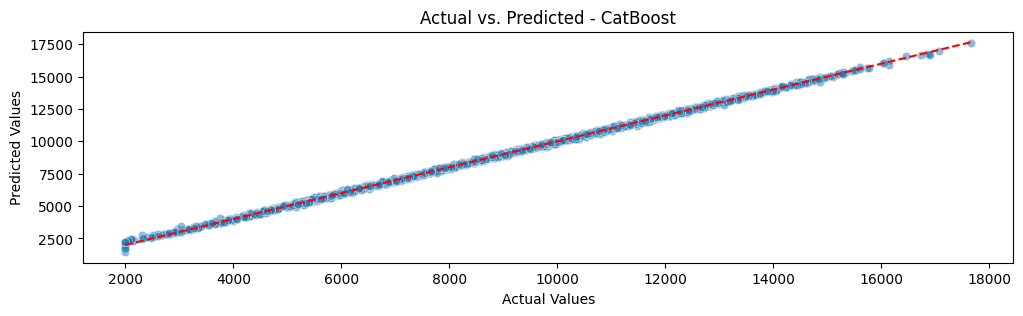

In [ ]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(12,3))

sns.scatterplot(x = y_val,
                y = y_val_pred,
                alpha = 0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

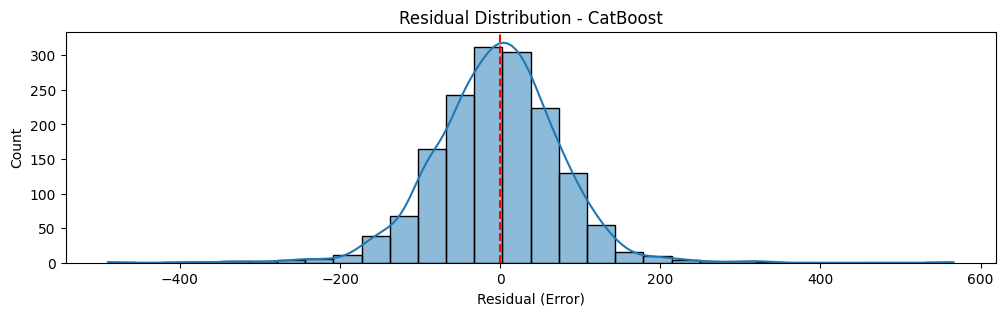

In [ ]:
# Residual Plot (Errors)
residuals = y_val - y_val_pred

plt.figure(figsize = (12,3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color = 'red', linestyle = 'dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

# **Apply Model on Test Data**

In [ ]:
with open('../../models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f) #Brand

with open('../../models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f) #Model

with open('../../models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f) #Fuel, Transmission

In the next step, we should encode categorical features.

In [ ]:
# Encoding Brand and Model
X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)
X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(), inplace=True)
X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(), inplace=True)
X_test.drop(['Brand', 'Model'], axis=1, inplace=True)

# Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns with the test data
X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_test = pd.concat([X_test_encoded, encoded_df_test], axis=1)

Now, we can predict test data.

In [ ]:
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R\u00b2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")


Test R²: 0.9997, Test RMSE: 48.9199


The result shows model is good generalized and there is no overfitting/underfitting.

# **CHECKPOINT**

In [ ]:
pickle.dump(final_model, open('../../models/Model.pkl', 'wb'))
